# Oreka termodinamikoa

Sistema termodinamikoak estatistikaren ikuspuntutik aztertzeko momentuan oinarrizko ideia $Boltzman$-en banaketa da. Honek deskribatzen du energiaren banaketa sistema termiko batean. Sistema termodinamikoen azterketarekin hasteko, oreka ikertuko dugu $Monte$ $Carlo$ metodoa erabiliz.

## Oreka termikoa lortu

Lehenengo eta behin egoera baten probabilitatea ulertzeko, hasiko gara kontatzen maila mikroskopikoan ditugun egoera posibleak. Demagun dugula sistema termiko bat partikula mikroskopikoz osatuta, hauek energia gorde dezakete era bibrazionalean, rotazionalean edo higiduran. Sistema honen adibide bat $Einstein$-en solido eredua da, non solidoa N osziladore harmoniko simple(OHS) eta independientez osatuta dagoen. Osziladore harmoniko bakoitzak eduki ditzake nahi dituen energi kuanto. Orain demagun gure sistema duen energia osoa $q\epsilon$ non $\epsilon$ energi kuantoa den. Energia hau banatu daiteke era ezberdinetan, energia banaketa bakoitza mikroegoera bat izango da.

Maila makroskopikoan aztertu nahi duguna dira kanpotik neurtu ditzakegun efektuak, hauei makroegoerak deitzen zaie. Kontzidera ditzagun bi mikroegoera lehen azaldu dugun adibidean, lehenengo mikroegoeran osziladore harmoniko bakar batek $q$ energia kuanto edukiko ditu eta beste $N-1$ osziladoreen energia 0 izango da, beste mikroegoera batean $q$ osziladoreek energi kuanto bakarra edukiko dute eta besteek zero. Bi mikroegora hauek makroegora berdina dira, $q$ energia osoa duena. Mikroegorea kopurua makroegoera baikoitzean $\Omega(N,q)$ da, kasu batzuetan zenbaki hau era analitikoan lortu dezakegu.

Behin kontzeptu hauek azaldu ditugula oreka aztertuko dugu, kontzidera ditzagun bi solido kontaktuan daudenak, A eta B, $N_A$ eta $N_B$ osziladore dituztenak, biek $q$ energia partekatzen dute, non $q=q_A+q_B$ den. Gure makroegoerari $n=n(q_A,q_B)$ deituko diogu, non $q_B=q-q_A$ kalkulatu dezakegun $q_A$ emanda. Bestalde hurrengo propietatea betetzen da:
$$\Omega(n)=\Omega_A(N_A,q_A)x\Omega_B(N_B,q_B)$$

Honek esaten digu mikroegoeren kopurua $q_A$ eta $q_B$ energi banaketa bakoitzerako.

Gure $\Omega$ probabilitateekin lotzeko, erabiliko dugu estatistikaren postulatu oso garrantzitsu bat, postulatu honek esaten duena da  sistema isolatu batean dauden mikroegoera guztiek probabilitate berbera dutela gertatzeko. Hau erabiliz esan dezakegu gure sistema $n$ makroegoeran egoteko probabilitatea ondorengoa dela:
$$P(n)=\dfrac{\Omega(n)}{\Omega_T}$$

Non $\Omega_T=\sum\limits_n \Omega(n)$ den.

Probabilitatea teorikoki kalkulatu dezakegu edo bere konportamoldea simulatuz, guk bigarren erara egingo dugu. Azterketa hau egiteko, kontsideratuko dugu solido txiki bat beste handi batekin kontaktuan dagoena, hau da, $N_A	\ll N_B$ betetzen da, hau gertatzen da solido batek ingurunearekin kontaktuan dagoenean.

Gure simulazioa egiteko komenigarria da erabiltzea objetuak $Einstein$-en solidoa eraikitzeko funtzio bat erabiltzea baino. Objetu hau erabiliko dugu progama askotan eta bi solidoen arteko interakziorako hedatu dezakegu. Honan hemen $Einstein$-en solidoaren objetua:

In [1]:
import random as rnd

class Einstein:                                 #Einsteinen solidoen eredua
    def __init__ (self,N=400,q=10):
        self.N=N
        self.cell=[q]*N                         #q energia kuanto gelaxka bakoitzean
    
    def __add__ (self,other):                     #bi solidoak konbinatu
        self.N += other.N
        self.cell += other.cell
        return cell
    def exchange(self,L=20000):                    #Energia trukaketa
        for i in range(L):
            take=rnd.randint(0,self.N-1)        #Lortu bi zorizko zenbaki 
            give=rnd.randint(0,self.N-1)
            while self.cell[take]==0:           #Aurkitu energia>0 duen gelaxka
                take=rnd.randint(0,self.N-1)
            self.cell[take] -= 1                  #Energia trukatu
            self.cell[give] += 1

**Programa 1:** Einstein-en solidoen eredua

$init()$ funtzioari deitzen zaio N osziladore harmonikoak hasieratzeko eta beraien energiak gelaxketan gordetzeko zerrenda batean. Hurrengo funtzioa, $add()$, batuketa eragilea definitzen du, zeinek bi solido konbinatzen baditugu non $C=A+B$ ematen den, orduan $N_C=N_A+N_B$ emango da eta gainera gelaxkak katetuko dira. Gure sisteman onartuta dauden mikroegora guztiak probabilitate berdina dutenez, osziladore harmonikoei utziko diegu energia trukatzea askatasunez, hau $exchange()$ progamak egiten du. Iterazio bakoitzean, era aleatorioan hartzen ditu bi osziladore $randint(n_1,n_2)$ funtzioa erabiliz, zeinek bueltatzen duen zenbaki bat $n_1$ eta $n_2$-ren artean. Gero, behin aurkituta osziladore harmoniko bat $E>0$ duena, kentzen dio energi kuanto bat eta beste osziladore harmonikoari ematen dio.

Behin hau egin dugula progama bat egingo dugu adierazteko $Einstein$-en solido baten energia distribuzioa.

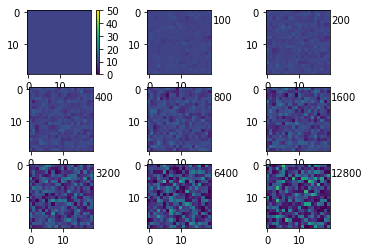

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as am


def irudia(*args):
    plot.set_data(np.reshape(solid.cell,(k,k)))   #irudia berridatzi
    return [plot]

k=20
solid=Einstein(N=k*k,q=10)
L=100
fig=plt.figure()

for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    img=np.reshape(solid.cell,(k,k))                  #Irudiaren itzura kxk izango da
    plot=plt.imshow(img,interpolation='none',vmin=0,vmax=50)
    if (i==0):
        plt.colorbar(plot)
    anim=am.FuncAnimation(fig,irudia,interval=1,blit=True)
    if (i>0):
        plt.text(20,3.5,repr(L*2**(i-1)))
    solid.exchange(L*2**i)
plt.show()

**Programa 2:** Oreka energia trukearekin

Irudi honetan energiaren distribuzioa dago irudikatuta, hasieran osziladore guztiei eman diegu energia berdina, baina denbora pasa ahala ikusten dugu osziladore batzuk energia gehiago hartzen dutela, baina gehienak energia txikiarekin geratzen dira. Hau da, egoera probableena energia baxua duena dela.

Hobeto ulertzeko hurrengo progama irudikatuko dugu, kasu honetan $N=1024$ osziladore erabiliz. Progama honek irdikatzen du n energia unitate dituzten osziladoreen zatidura erlatiboa histograma baten modura. Esan dugun modura hasieran osziladore guztiek $n=1$ energia dute, baina gero $n=0$ energia bueltatzen da probableena.

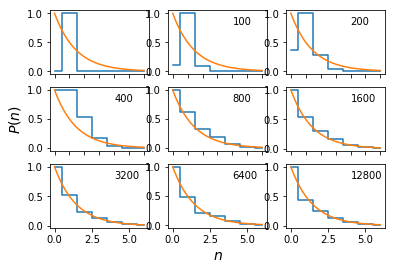

In [3]:
import matplotlib.pyplot as plt
import numpy as np

solid=Einstein(N=1024,q=1)                                  #Solidoa eratu
L,M,kT=100,6,1./np.log(2.)
E,bin=np.linspace(0.,M,100),np.zeros(M+1)
fig=plt.figure()

for i in range(9):
    ax=fig.add_subplot(3,3,i+1)
    for n in range(M+1):
        bin[n]=solid.cell.count(n)                           #Zenbat osciladore ditugu n energia kuantoekin
    plt.step(range(len(bin)),bin/max(bin),where='mid')
    plt.plot(E,np.exp(-E/kT))
    if (i==3):
        plt.ylabel('$P(n)$',fontsize=14)
    if (i==7):
        plt.xlabel('$n$',fontsize=14)
    if (i<=5):
        plt.xticks(range(M+1),[''for j in range(M+1)])
    if (i>0):
        plt.text(M-2,0.8,repr(L*2**(i-1)))
    solid.exchange(L*2**i)                                   #iterazio berri bat kalkulatu
plt.show()

**Programa 3:** Energiaren banaketaren probabilitatea.

Azkenengo 3 irudietan banaketa ez da asko aldatzen, honek esan nahi duena da gure sistema orekara heldu dela, eta bere itxura banaketa exponentzial batena dela:
$$P(n)=Ce^{-n\alpha}$$

Dauzkagun datuekin, erregresio lineal bat egin dezakegu lortzeko $\alpha=ln2$ dela lortzeko.

Egin dugun simulazioan, daukagun datu bakarra da bi sistemen osziladore harmonikoen kopurua $N=N_A+N_B$. Gure sistema aztertu dugun modutik pentsa dezakegu bi solido ditugula kontaktuan: $N_A=1$ eta $N_B=1023$. Iterakzioak egitean, hartzen ditugu bi edozein osziladore eta beraien artean energia trukatzen dugu, baina osziladore guztiak berdinak direnez daukagun efektua da osziladore bat (A solidoa) eta beste guztiekin (B solidoa) energia trukatzen duela. Metodo honi $Monte$ $Carlo$ metodoa deitzen zaio. Nahi izanez gero, gure programa egiteko hartu dezakegu osziladore bakar bat eta energia trukatu banan banan beste guztiekin, iterazioak eginez emaitza berdina izan behar da, baina programa pisutsuagoa izango litzateke.

## Entropia

Aurreko atalean ikusi dugun modura, gure sistema termikoa hasierako egoera ordenatu batetatik beste egorea nahasi batera joaten da. Orain egingo duguna da nabaritu dugun joera hau parametro fisiko batekin erlazionatuko dugu: $Entropia$. Entropiak sistema baten desorden maila ematen digu. $Boltzmann$-ek honela definitu zuen entropia:
$$S=k_b ln\Omega$$

non $k_b$ $Boltzmann$-en konstatea den. Entropiaren propietate garrantzitsu bat da batukorra dela, hau da, sistema konposatu baten entropia osoa sistema bakoitzaren entropien batura da. Behin hau definitu dugula lehen deskribatu dugun solidoaren entropia kalkula dezakegu. Horretarako, demagun gure sistema iturri batekin kontaktuan dagoela, beraz esan dugun modura $S+S_i=S_T$ izango da, eta $S=P_1S(1)+P_2S(2)+...=\sum\limits_{n}P_nS(n)$ denez iturriaren entropia idatzi dezakegu:
$$S_R=k\sum\limits_{n}P_nln\Omega_n$$
Bestalde lehen definitu dugun modura $P(n)=\dfrac{\Omega}{\Omega_T}$ da:
$$S_R=k\sum\limits_{n}P_n(lnP_n+ln\Omega_T)=k\sum\limits_{n}P_nlnP_n+kln\Omega_T$$
Gogoratu probabilitateak normalizatuta daudela: $\sum\limits_{n}P_n=1$

Dena bere lekuan ordezkatuz:
$$S=S_T-S_R=S_T-k\sum\limits_{n}P_nlnP_n-kln\Omega_T=-k\sum\limits_{n}P_nlnP_n$$

Behin hau lortu dugula, hurrengo funtzioa eraiki dezakegu osziladore baten entropia kalkulatzeko sistema baten barruan:

In [4]:
def entropia(cell):                              #Einstein-en solidoaren entropia
    N,n,nt,s=len(cell),0,0,0.
    while nt<N:                                  #Gelaxka guztiak kontatu harte
        cn=cell.count(n)                         #Zenbat gelaxka En energia dute
        n,nt=n+1,nt+cn
        p=cn/float(N)                            #En energia edukitzeko probabilitatea
        if (cn != 0):
            s=s-p*np.log(p)                      #Entropia kalkulatu ___ ekuazioa
    return s


**Programa 4:** Einstein-en solidoaren entropiaren kalkulua.

Funtzio hau definitu dugula inplementa dezakegu lehen aztertu dugun sistemaren entropia kalkulatzeko.

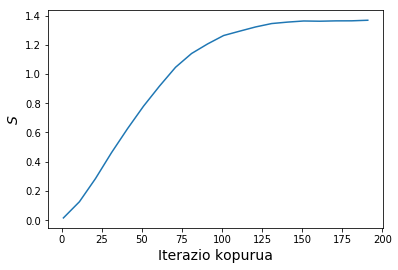

In [5]:
solid=Einstein(N=1024,q=1)
y,x=np.zeros(20),np.zeros(20)
for i in range(0,20):
    solid.exchange(1+10*i)
    y[i]=entropia(solid.cell)
    x[i]=1+10*i
plt.plot(x,y)
plt.ylabel('$S$',fontsize=14)
plt.xlabel('Iterazio kopurua',fontsize=14)
plt.show()

**Programa 5:** Osziladore baten entropia.

Ikusi dezakegu nola hasieran entropia O dela, hau da, gure sistema guztiz ordenatuta dagoela, eta denbora aurrera egiterakoan entropia handitzen dela. Emendik atera dezakegun ondorioa ondokoa da: entropia handitzera jotzen du. Hau termodinamikaren bigarren legea da, eta lehen ezarri dugun erlazioa dela eta sistema bat orekan egongo da $\Omega$ handieneko makroegoeran dagoenean, hau da, entropia maximoa denean oreka lortu dugu.

## Tenperatura

Intuizioak esaten digun moduan bi sistema orekan daude tenperatura berdina dutenean. Beraz petsa dezakegu erlazio bat egongo dela entropia eta tenperaturaren artean. Dakigun modura bi sistemen arteko oreka entropia totala maximoa denean, hau da:
$$\dfrac{\partial S_T}{\partial q_B}=\dfrac{\partial S_B}{\partial q_B}+\dfrac{\partial S_A}{\partial q_B}=0 \Rightarrow \dfrac{\partial S_B}{\partial q_B}=\dfrac{\partial S_A}{\partial q_A}$$

$q=q_A+q_B$ erabili dugu azkeneko pausuan. Beraz lortu dugu magnitude bat berdina izan behar dena bi sistemak orekan egoteko, hau esan dugun modura tenperatura izan behar da. Bestalde, kontsideratuz tenperatura energiarekin handitzen dela honela definituko dugu:
$$\dfrac{1}{T}=\dfrac{\partial S}{\partial E}$$

Ikusi dugun modura gure $Einstein$-en solidoan entropia handitzen da energiarekin eta ondorioz tenperatura baita, baina hau ez beti honela, zenbait sistema paramagnetikoek bakarrik gorde dezakete energi mugatu bat, kasu hauetan entropia txikitzen da eta ondorioz $\dfrac{\partial S}{\partial E}<0$ izango da eta sistemaren tenperatura baita.

## Boltzman-en banaketa

Gure sistema (sitema bat iturri batekin kontaktuan dagoena) $E_n$ eta $E_m$ energietan egoteko probabilitatea &4& ekuaziotik lortu dezakegu kontuan izanda $\Omega$ eta probabilitateak lotuta daudela:
$$\dfrac{P_n}{P_m}=\dfrac{\Omega _n}{\Omega_m}=e^{[S_R(n)-S_R(m)]/k}$$
non $S_R(n)=S_R(E-E_n)$ iturriaren entropia den. Bestalde, $\Delta E=E_n-E_m$ txikia denez $10.$ ekuazioren exponentzialan $Taylor$-en garapena egin dezakegu:
$$S_R(m)=S_R(E-E_n+\Delta E)=S_R(n)+\dfrac{\partial S_R(n)}{\partial E_R}\Delta E+O[(\Delta E)^2]$$
$9.$ ekuazioan ikuzi dugun modura $\partial S_R(n)/\partial E_R=1/T$ da. Beraz bigarren ordeneko zuzenketa arbuiatuz $11.$ ekuazioa honela idatzi dezakegu:
$$S_R(m)=S_R(n)+\dfrac{\Delta E}{T}$$
Hau $10.$ ekuazioan ordezkatuz:
$$\dfrac{P_n}{P_m}=e^{\Delta E/kT}=\dfrac{e^{-E_n/kT}}{e^{-E_m/kt}}$$
Hemendik ikusi dezakegu sistema bat $E_n$ energiarekin egoteko probabilitatea $Boltzman$-en banaketa ematen digula:
$$P_n=\dfrac{1}{Z}e^{-E_n/kT}$$
non $\dfrac{1}{Z}$ normalizazio konstantea den.
Gure sistema endekatua badago egin behar dugun aldaketa bakarra hau da: $P_n=\dfrac{1}{Z}d_n e^{-E_n/kT}$, non $d_n$ $E_n$ energia duten egoeren kopurua den.
Normalean Z-ri partizio funtzioa deitzen zaio eta honela definitzen da:
$$Z=\sum\limits_{n}exp(-E_n/kT)$$
Sistema baten partizio funtzioa ezagutzen badugu sistema horren ezaugarri guztiak ezagutuko ditugu. Adibidez, bataz besteko energia:
$$\langle E\rangle=\sum\limits_{n}E_np(E_n)=-\dfrac{\partial lnZ}{\partial \beta}  ; \beta\equiv\dfrac{1}{kT}$$
Beste adibide garratzitsu bat bero ahalmena da, honek esaten digu zenbat energia eman behar diogu sistema bati bere tenperatura gradu bat igotzeko. Honela definitzen da:
$$C(T)=\dfrac{\partial\langle E\rangle}{\partial T}=\dfrac{\Delta^2E}{kT^2}$$
non $\Delta^2E=\langle E^2\rangle-\langle E\rangle^2$ energiaren aldaketa den. Azkenik hau emanda $3.$ ekuazioan egin dugun $\alpha=ln2$ aukeraketa azaldu dezakegu. Kontuan izanda $E_n=n\epsilon$ dela $\alpha=\epsilon /kT$ izan behar da, bestalde osziladore harmonikoen (gure sistema) energia $E=(n+1/2)\epsilon$ da beraz partizio funtzioa:
$$Z=e^{-\dfrac{\epsilon}{2kT}}(1+e^{-\dfrac{\epsilon}{kT}}+e^{-\dfrac{2\epsilon}{kT}}+...)=\dfrac{e^{-\dfrac{\epsilon}{2kT}}}{1-e^{-\dfrac{\epsilon}{kT}}}=(e^{\epsilon/2kT}-e^{-\epsilon/2kT})^{-1}$$
Beraz bataz besteko energia:
$$\langle E\rangle=\dfrac{1}{2}\epsilon+\dfrac{\epsilon}{e^{\epsilon/2kT}-1}$$
Hemendik $\alpha$ askatuz:
$$\alpha=\dfrac{\epsilon}{kT}=ln(1+\dfrac{\epsilon}{\langle E\rangle})$$
Behin hau dugula $3.$ ekuazioko sisteman, $Einstein$-en solidoan batezbesteko energia $\langle E\rangle=\epsilon$ da, beraz $\alpha=ln2$ izango da, esan genuen bezala eta gure programak aurresaten zuen bezala.

## Hurrengo lanak

Esandako tenperaturaren konportamoldea ez da beti honela, zenbait sistema paramagnetikoek bakarrik gorde dezakete energi mugatu bat, kasu hauetan entropia txikitzen da eta ondorioz $\partial S/\partial E<0$ izango da, hau da, tenperatura negatiboko sistema bat edukiko dugu. Oso interesgarria izango litzateke mota honetako sistema bat ikertzea.